## Low level image processing
Conform image pre-processing, like reducing noise, contast enhancemente and image sharpening

Low-level processes involve primitive operations such as image preprocessing to reduce noise, contrast enhancement, and image sharpening. A low-level process is characterized by the fact that both its inputs and outputs are images. Mid-level processing on images involves tasks such as segmentation (partitioning an image into regions or objects), description of those objects to reduce them to a form suitable for computer processing, and classification (recognition) of individual objects. A mid-level process is characterized by the fact that its inputs generally are images, but its outputs are attributes extracted from those images (e.g., edges, contours, and the identity of individual objects). Finally, higher-level processing involves “making sense” of an ensemble of recognized objects, as in image analysis, and, at the far end of the continuum, performing the cognitive functions normally associated with vision.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

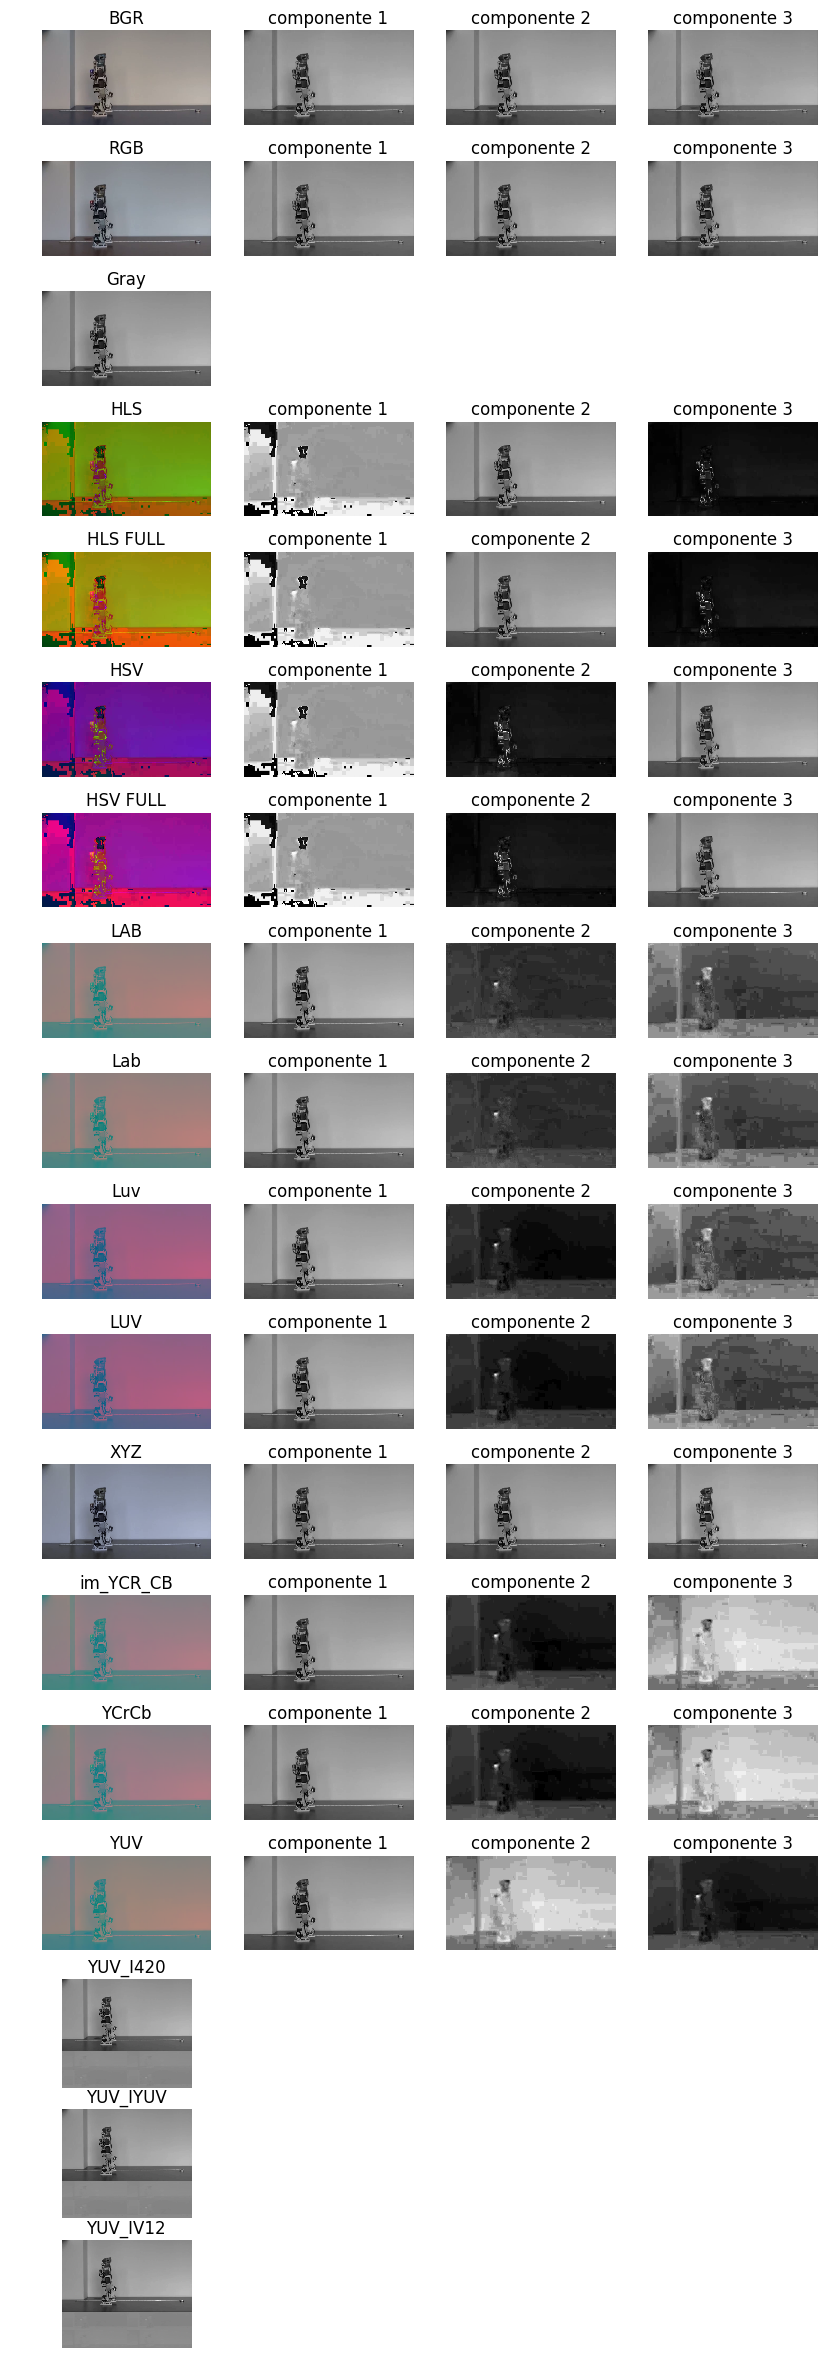

In [9]:
im = cv2.imread('data/biowalk-0300.png',cv2.IMREAD_COLOR)

im_rgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im_hls = cv2.cvtColor(im,cv2.COLOR_BGR2HLS)
im_hls_f = cv2.cvtColor(im,cv2.COLOR_BGR2HLS_FULL)
im_hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
im_hsv_f = cv2.cvtColor(im,cv2.COLOR_BGR2HSV_FULL)
im_LAB = cv2.cvtColor(im,cv2.COLOR_BGR2LAB)
im_Lab = cv2.cvtColor(im,cv2.COLOR_BGR2Lab)
im_Luv = cv2.cvtColor(im,cv2.COLOR_BGR2Luv)
im_LUV = cv2.cvtColor(im,cv2.COLOR_BGR2LUV)
im_XYZ = cv2.cvtColor(im,cv2.COLOR_BGR2XYZ)
im_YCR_CB = cv2.cvtColor(im,cv2.COLOR_BGR2YCR_CB)
im_YCrCb = cv2.cvtColor(im,cv2.COLOR_BGR2YCrCb)
im_YUV = cv2.cvtColor(im,cv2.COLOR_BGR2YUV)
im_YUV_I420 = cv2.cvtColor(im,cv2.COLOR_BGR2YUV_I420)
im_YUV_IYUV = cv2.cvtColor(im,cv2.COLOR_BGR2YUV_IYUV)
im_YUV_IV12 = cv2.cvtColor(im,cv2.COLOR_BGR2YUV_YV12)

images = [im, im_rgb, im_gray, im_hls, im_hls_f, 
          im_hsv, im_hsv_f, im_LAB, im_Lab, im_Luv,
          im_LUV, im_XYZ, im_YCR_CB, im_YCrCb, im_YUV,
          im_YUV_I420, im_YUV_IYUV, im_YUV_IV12]
titles = ['BGR', 'RGB', 'Gray', 'HLS', 'HLS FULL', 
          'HSV', 'HSV FULL', 'LAB', 'Lab', 'Luv',
          'LUV', 'XYZ', 'im_YCR_CB', 'YCrCb', 'YUV',
          'YUV_I420', 'YUV_IYUV', 'YUV_IV12']

plt.figure(figsize=(10,30))
for i, ima in enumerate(images):
    plt.subplot(len(images),4,4*i+1)
    if i==2 or i==15 or i==16 or i==17:
        plt.imshow(ima,cmap='gray'),plt.axis('off'),plt.title(titles[i])
    else:
        plt.imshow(ima),plt.axis('off'),plt.title(titles[i])
        plt.subplot(len(images),4,4*i+2),plt.imshow(ima[:,:,0],cmap='gray'),plt.axis('off'),plt.title('componente 1')
        plt.subplot(len(images),4,4*i+3),plt.imshow(ima[:,:,1],cmap='gray'),plt.axis('off'),plt.title('componente 2')
        plt.subplot(len(images),4,4*i+4),plt.imshow(ima[:,:,2],cmap='gray'),plt.axis('off'),plt.title('componente 3')
plt.show()


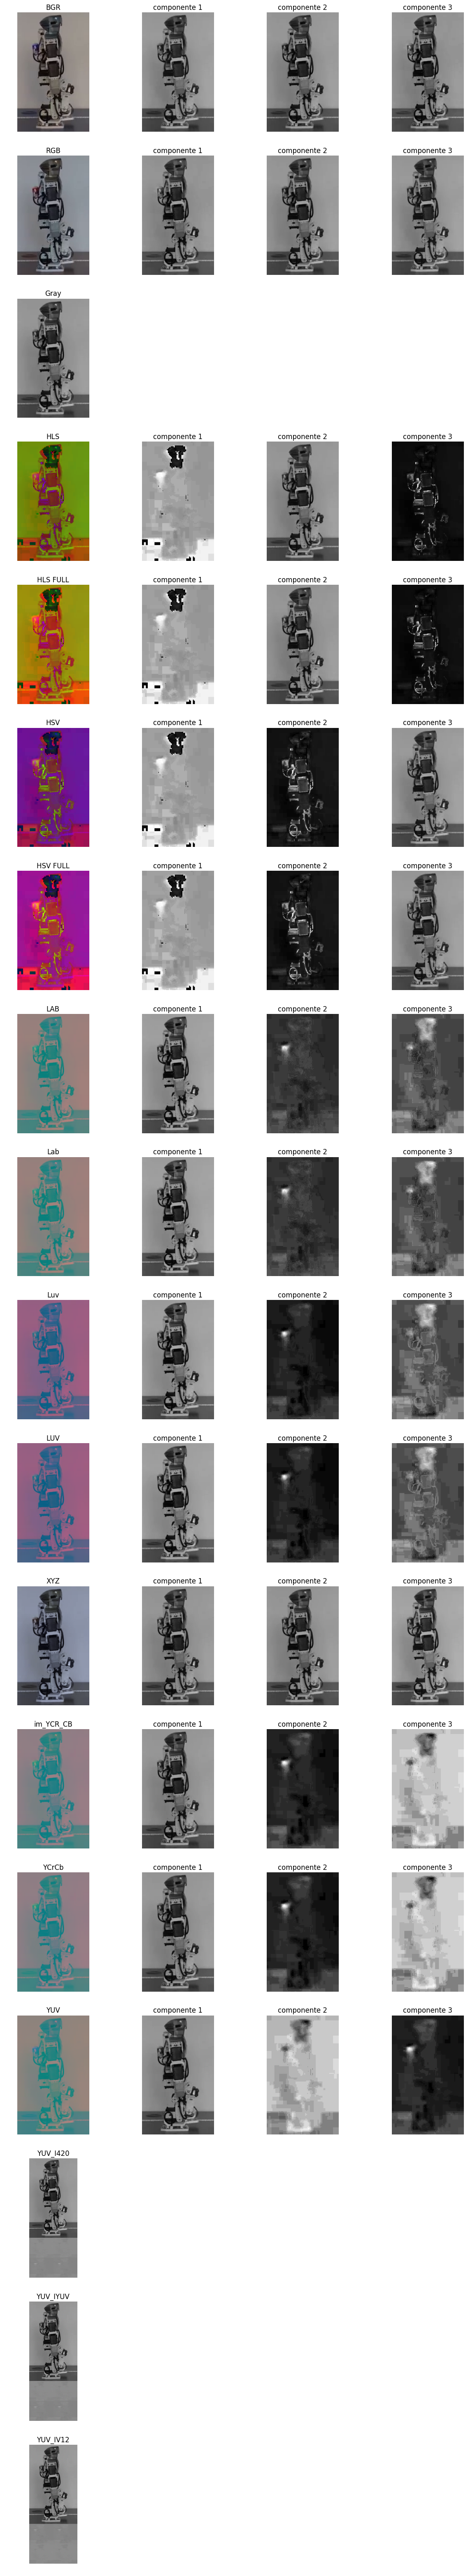

In [7]:
im = cv2.imread('data/biowalk-0300.png',cv2.IMREAD_COLOR)
im = im[85:335, 150:300]

im_rgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im_hls = cv2.cvtColor(im,cv2.COLOR_BGR2HLS)
im_hls_f = cv2.cvtColor(im,cv2.COLOR_BGR2HLS_FULL)
im_hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
im_hsv_f = cv2.cvtColor(im,cv2.COLOR_BGR2HSV_FULL)
im_LAB = cv2.cvtColor(im,cv2.COLOR_BGR2LAB)
im_Lab = cv2.cvtColor(im,cv2.COLOR_BGR2Lab)
im_Luv = cv2.cvtColor(im,cv2.COLOR_BGR2Luv)
im_LUV = cv2.cvtColor(im,cv2.COLOR_BGR2LUV)
im_XYZ = cv2.cvtColor(im,cv2.COLOR_BGR2XYZ)
im_YCR_CB = cv2.cvtColor(im,cv2.COLOR_BGR2YCR_CB)
im_YCrCb = cv2.cvtColor(im,cv2.COLOR_BGR2YCrCb)
im_YUV = cv2.cvtColor(im,cv2.COLOR_BGR2YUV)
im_YUV_I420 = cv2.cvtColor(im,cv2.COLOR_BGR2YUV_I420)
im_YUV_IYUV = cv2.cvtColor(im,cv2.COLOR_BGR2YUV_IYUV)
im_YUV_IV12 = cv2.cvtColor(im,cv2.COLOR_BGR2YUV_YV12)

images = [im, im_rgb, im_gray, im_hls, im_hls_f, 
          im_hsv, im_hsv_f, im_LAB, im_Lab, im_Luv,
          im_LUV, im_XYZ, im_YCR_CB, im_YCrCb, im_YUV,
          im_YUV_I420, im_YUV_IYUV, im_YUV_IV12]
titles = ['BGR', 'RGB', 'Gray', 'HLS', 'HLS FULL', 
          'HSV', 'HSV FULL', 'LAB', 'Lab', 'Luv',
          'LUV', 'XYZ', 'im_YCR_CB', 'YCrCb', 'YUV',
          'YUV_I420', 'YUV_IYUV', 'YUV_IV12']

plt.figure(figsize=(15,80))
for i, ima in enumerate(images):
    plt.subplot(len(images),4,4*i+1)
    if i==2 or i==15 or i==16 or i==17:
        plt.imshow(ima,cmap='gray'),plt.axis('off'),plt.title(titles[i])
    else:
        plt.imshow(ima),plt.axis('off'),plt.title(titles[i])
        plt.subplot(len(images),4,4*i+2),plt.imshow(ima[:,:,0],cmap='gray'),plt.axis('off'),plt.title('componente 1')
        plt.subplot(len(images),4,4*i+3),plt.imshow(ima[:,:,1],cmap='gray'),plt.axis('off'),plt.title('componente 2')
        plt.subplot(len(images),4,4*i+4),plt.imshow(ima[:,:,2],cmap='gray'),plt.axis('off'),plt.title('componente 3')
plt.show()


(0, 245)


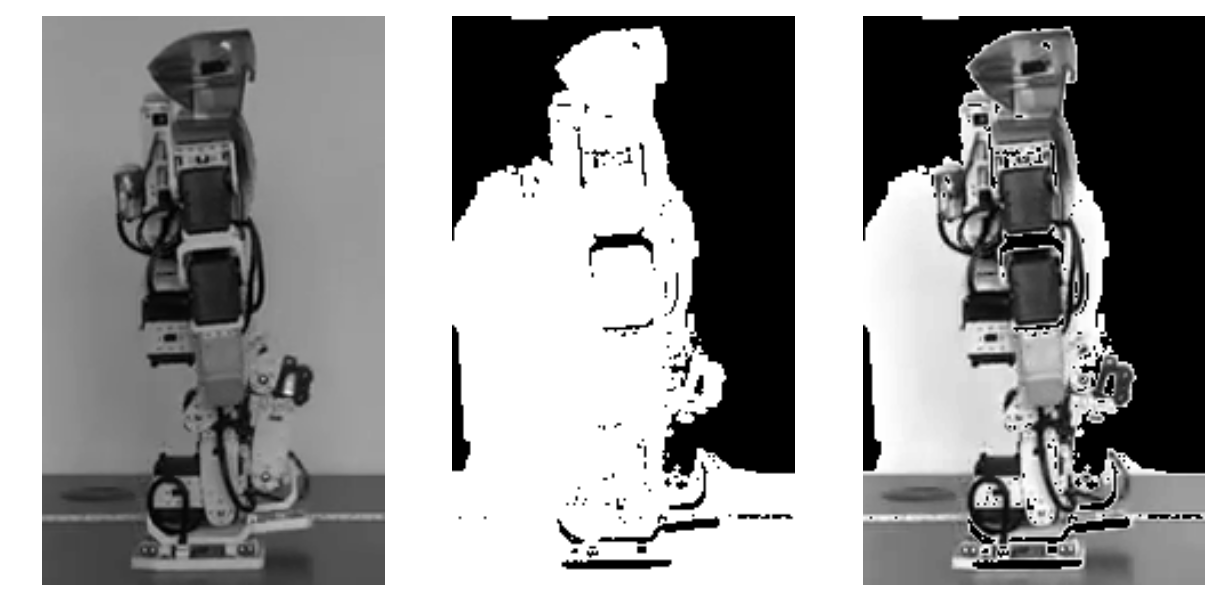

In [20]:
# color segmentation
im = cv2.imread('data/biowalk-0300.png',cv2.IMREAD_GRAYSCALE)
im = im[85:335, 150:300]
#im = im[0:50, 0:42]
print(np.min(im),np.max(im))
mask = np.zeros_like(im)
mask[(138>=im)&(im<=159)] = 1

plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(im, cmap='gray', interpolation=None), plt.axis('off')
plt.subplot(1,3,2),plt.imshow(mask, cmap='gray', interpolation=None), plt.axis('off')
plt.subplot(1,3,3),plt.imshow(mask*im, cmap='gray', interpolation=None), plt.axis('off')
plt.show()
